In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
img=cv2.imread('001109.png')


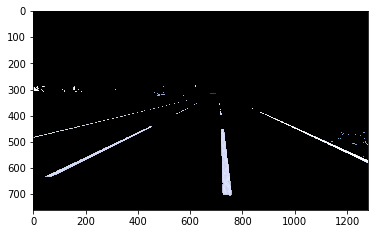

In [3]:
#Convert the image to HSV 
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#Defining HSV white filter
lower_white = np.uint8([  0, 0,   200])
upper_white = np.uint8([55, 255, 255])

#applying HSV white filter to the image
white_mask = cv2.inRange(hsv, lower_white, upper_white)
white_image = cv2.bitwise_and(img, img, mask = white_mask)

plt.imshow(white_image,'gray')


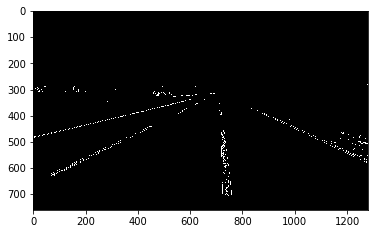

In [4]:
#Edge detection 
edges_img = cv2.Canny(white_image,20,10)
plt.imshow(edges_img,'gray')

In [5]:
#reading image shape
img_shape = img.shape
x_max = img_shape[0]
y_max = img_shape[1]

#defining min and max values for Rho and Theta
r_min = 0.0
r_max = math.hypot(x_max, y_max)
r_dim = 200
theta_dim = 180
theta_max=1.0 * math.pi 

#Creating a NUll matrix to define Hough space transformation
hough_space = np.zeros((r_dim,theta_dim))

#Creating a list to save selected values ( Rho, Theta, )
list_lines=[]


#reading the image values 
for i in range(x_max):
    for j in range(y_max):
        
        #Checking if the pixel is white in the edged_image
        if edges_img[i,j] == 255: 
            
            # calculate Hough transform for every Theta value
            for idx_theta in range(0,theta_dim,3):
                
                #convert theta to Radians
                theta =  (idx_theta) * theta_max / theta_dim 
                r =i * math.cos(theta) + j * math.sin(theta)
                ir = int(r_dim * r  / r_max)
                hough_space[ir,idx_theta] = hough_space[ir,idx_theta] + 1
                
                #selecting only values higher than a threshold
                if hough_space[ir,idx_theta] > img_shape[0]/2 and idx_theta not in list_lines and ir not in list_lines:  
                    list_lines.append([r,theta,j])



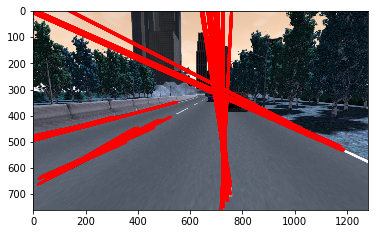

In [6]:
fig, ax = plt.subplots()
ax.imshow(img)
ax.autoscale(False)

#reading the list of data to draw the lines. 
for line in (list_lines):
    
    r=line[0]
    theta= line[1]
          
    interval_y_label=[-line[2]-20,line[2]+20]
    
    px = []
    py = []
    
    for y in interval_y_label:
            px.append( math.cos(-theta) * y - math.sin(-theta) * r ) 
            py.append( math.sin(-theta) * y + math.cos(-theta) * r )           
            
    ax.plot(px,py, color='red', linewidth=2)